In [43]:
# import necessary libraries and load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skewtest
from scipy.stats import median_test
from scipy.stats import shapiro
import pylab
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from statsmodels.stats.proportion import proportions_ztest
from sklearn.impute import KNNImputer

pd.set_option("display.max_columns",None);
pd.set_option("display.max_rows",None);

In [46]:
# import Google Drive
from google.colab import drive
# mount drive
drive.mount('/content/drive')
# 透過 gdrive/My Drive/... 來存取檔案
df = pd.read_excel("/content/drive/My Drive/DS Job/Untitled folder/ab_testing.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
control_df = pd.read_excel("/content/drive/My Drive/DS Job/Untitled folder/ab_testing.xlsx", sheet_name='Control Group')# maximum bidding
test_df = pd.read_excel("/content/drive/My Drive/DS Job/Untitled folder/ab_testing.xlsx", sheet_name='Test Group') # average bidding

In [48]:
# Control Group (Maximum bidding)
control_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.449068,20302.157862,45475.942965,85726.690349,99790.701078,115212.816543,147539.336329
Click,40.0,5100.657373,1329.985498,2189.753157,4124.304129,5001.220602,5923.803596,7959.125069
Purchase,40.0,550.894059,134.108201,267.028943,470.095533,531.206307,637.957088,801.795020
Earning,40.0,1908.568300,302.917783,1253.989525,1685.847205,1975.160522,2119.802784,2497.295218


In [49]:
# Test Goup (Average_bidding)
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,120512.411758,18807.448712,79033.834921,112691.970770,119291.300775,132050.578933,158605.920483
Click,40.0,3967.549761,923.095073,1836.629861,3376.819024,3931.359804,4660.497911,6019.695079
Purchase,40.0,582.106097,161.152513,311.629515,444.626828,551.355732,699.862360,889.910460
Earning,40.0,2514.890733,282.730852,1939.611243,2280.537426,2544.666107,2761.545405,3171.489708


In [50]:
desc_compare_df = pd.DataFrame ({"Control_Impression": control_df["Impression"].describe (),"Test_Impression": test_df["Impression"].describe (),
                                 "Control_Click": control_df["Click"].describe (),"Test_Click": test_df["Click"].describe (),
                                 "Control_Purchase": control_df["Purchase"].describe (),"Test_Purchase": test_df["Purchase"].describe (),
                                 "Control_Earning": control_df["Earning"].describe (),"Test_Earning": test_df["Earning"].describe ()})

In [51]:
desc_compare_df.head()

,Control_Impression,Test_Impression,Control_Click,Test_Click,Control_Purchase,Test_Purchase,Control_Earning,Test_Earning
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,101711.449068,120512.411758,5100.657373,3967.549761,550.894059,582.106097,1908.568300,2514.890733
std,20302.157862,18807.448712,1329.985498,923.095073,134.108201,161.152513,302.917783,282.730852
min,45475.942965,79033.834921,2189.753157,1836.629861,267.028943,311.629515,1253.989525,1939.611243
25%,85726.690349,112691.970770,4124.304129,3376.819024,470.095533,444.626828,1685.847205,2280.537426


In [ ]:
### Assumption Check
### in order to apply ab test, normality and variance homogeneity must be satisfied
### If normality and variance homogeneity is provided, an independent two-sample t-test (parametric test) is applied.
### If normality and homogeneity of variance are not provided, the Mann-Whitney U test (non-parametric test) is performed.

<ipython-input-52-d27c3e6deeec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (control_df[col], hist=False,ax=ax[0])
<ipython-input-52-d27c3e6deeec>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (test_df[col], hist=False,ax=ax[1])


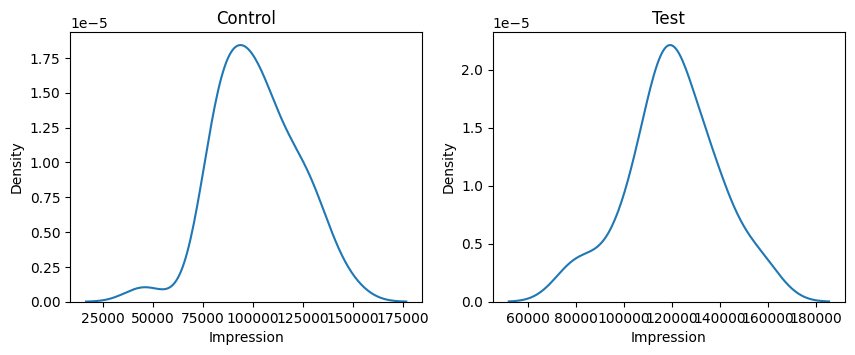

<ipython-input-52-d27c3e6deeec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (control_df[col], hist=False,ax=ax[0])
<ipython-input-52-d27c3e6deeec>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (test_df[col], hist=False,ax=ax[1])


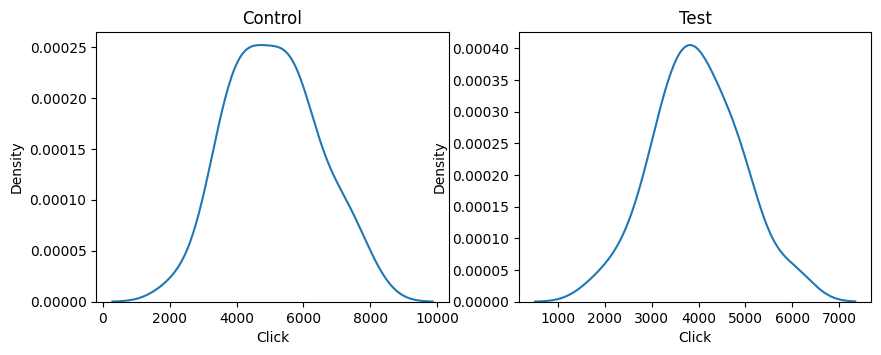

<ipython-input-52-d27c3e6deeec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (control_df[col], hist=False,ax=ax[0])
<ipython-input-52-d27c3e6deeec>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (test_df[col], hist=False,ax=ax[1])


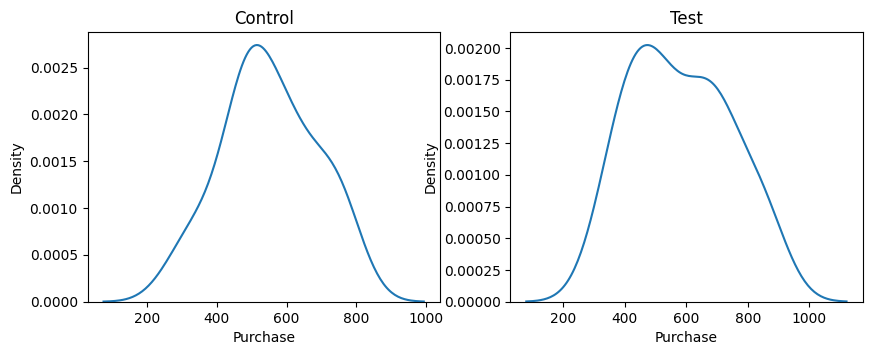

<ipython-input-52-d27c3e6deeec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (control_df[col], hist=False,ax=ax[0])
<ipython-input-52-d27c3e6deeec>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (test_df[col], hist=False,ax=ax[1])


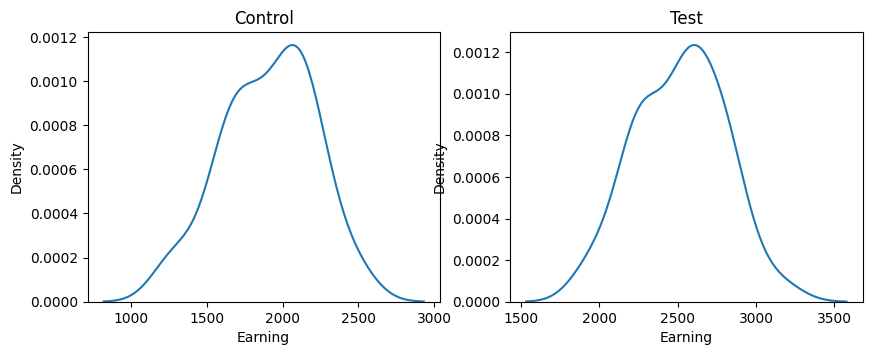

In [52]:
### Shapiro-Wilks for normality
### H0 : There is no statistically significant difference between sample distribution and theoretical normal distribution
### H1 : There is statistically significant difference between sample distribution and theoretical normal distribution
### rejected if p_value < 0.05
cols = ['Impression','Click','Purchase','Earning']
for col in cols:
        fig, ax = plt.subplots(1,2)
        fig.set_figheight(3.5)
        fig.set_figwidth(10)
        sns.distplot (control_df[col], hist=False,ax=ax[0])
        sns.distplot (test_df[col], hist=False,ax=ax[1])
        ax[0].set_title('Control')
        ax[1].set_title('Test')
        plt.show()

In [53]:
### normal distribution observed, but may be misleading so still check
print('Control Group \n')
#cols = ['Earning_Per_Click','Impression_Per_Click','Puchasing_Per_Impression']
for col in cols:
    test_stat, pvalue = shapiro(control_df[col])
    print(col)
    print('Test Stat = %.4f, p-value = %.4f \n' % (test_stat, pvalue))
### all p-values > 0 so H0 not rejected. Normality provided

Control Group 

Impression
Test Stat = 0.9697, p-value = 0.3514 

Click
Test Stat = 0.9844, p-value = 0.8461 

Purchase
Test Stat = 0.9773, p-value = 0.5891 

Earning
Test Stat = 0.9756, p-value = 0.5306 



In [54]:
print('Test Group \n')
#cols = ['Earning_Per_Click','Impression_Per_Click','Puchasing_Per_Impression']
for col in cols:
    test_stat, pvalue = shapiro(test_df[col])
    print(col)
    print('Test Stat = %.4f, p-value = %.4f \n' % (test_stat, pvalue) )

# same for test group

Test Group 

Impression
Test Stat = 0.9720, p-value = 0.4148 

Click
Test Stat = 0.9896, p-value = 0.9699 

Purchase
Test Stat = 0.9589, p-value = 0.1541 

Earning
Test Stat = 0.9780, p-value = 0.6163 



In [ ]:
### variance homogeneity
### use levene's test
### H0: There is no statistically significant difference between the variance of variance of the related variables of the 2 groups.
### H1: There is a statistically significant difference between the variance of variance of the related variables of the 2 groups.
### reject if p < 0.05

In [55]:
for col in cols:
    ttest_lev, p_value_lev = levene (control_df[col], test_df[col])
    print(col)
    print ("ttest statistics: {}\np_value: {}\n".format (ttest_lev, p_value_lev))
### all except click's p-value > 0.05. Cannot reject H0 for 3/4. No statistically significant difference between
### variance distributions of impression, purchase, and earning of the control adn test groups
### p-value for click < 0 so reject. Statistically significant difference between variance distributions of the click
### values of the 2 groups

Impression
ttest statistics: 0.5864573472359864
p_value: 0.44610356360916026

Click
ttest statistics: 6.304093663057767
p_value: 0.014114218126827834

Purchase
ttest statistics: 2.6392694728747363
p_value: 0.10828588271874791

Earning
ttest statistics: 0.35323781392537446
p_value: 0.5540060067717659



In [ ]:
### Implement hypothesis
### For Impression, purchase and earning, normality and variance homogeneity are provided. Independent two-sample
### t-test (parametric) will be applied.

###The Independent Two-Sample T Test compares the means of two independent groups in order to determine whether
### there is statistical evidence that the associated population means are significantly different.
# H0: µ1 = µ2 (the two population means are equal)
# H1: µ1 ≠ µ2 (the two population means are not equal)

In [60]:
# impression
ttest_ind_Imp, p_value_ind_Imp = ttest_ind (control_df["Impression"], test_df["Impression"], equal_var=True)
print ("t-test statistics: {}\np_value: {}".format (ttest_ind_Imp, p_value_ind_Imp))

t-test statistics: -4.296597673723916
p_value: 4.954754307167222e-05


In [61]:
# purchase
ttest_ind_pur, p_value_ind_pur = ttest_ind (control_df["Purchase"], test_df["Purchase"], equal_var=True)
print ("t-test statistics: {}\np_value: {}".format (ttest_ind_pur, p_value_ind_pur))

t-test statistics: -0.9415584300312966
p_value: 0.34932579202108416


In [62]:
# earning
ttest_ind_earn, p_value_ind_earn = ttest_ind (control_df["Earning"], test_df["Earning"], equal_var=True)
print ("t-test statistics: {}\np_value: {}".format (ttest_ind_earn, p_value_ind_earn))

t-test statistics: -9.254514649275333
p_value: 3.464659528461278e-14


In [63]:
#Given click normality is provided but not variance homogeneity,
### mann-whitney U test (non-parametric test) will be performed.
ttest_value_Click, p_value_Click = mannwhitneyu (control_df["Click"], test_df["Click"])
print ("t-test statistics: {}\np_value: {}".format (ttest_value_Click, p_value_Click))

t-test statistics: 1198.0
p_value: 0.00013080100099724853


In [64]:
# So far, we have compared two groups over the features given in the data set.
# Now, we continue to compare over the proportional features we have derived.
# We will use Two Sample Ratio Test (z test) for ratio comparisons.
groups = [control_df, test_df]
for group in groups:
    group["Click_Per_Impression"] = group["Click"] / group["Impression"]
    group["Earning_Per_Click"] = group["Earning"] / group["Click"]
    group["Puchasing_Per_Impression"] = group["Purchase"] / group["Impression"]
control_df.head ()


,Impression,Click,Purchase,Earning,Click_Per_Impression,Earning_Per_Click,Puchasing_Per_Impression
0,82529.459271,6090.077317,665.211255,2311.277143,0.073793,0.379515,0.008060
1,98050.451926,3382.861786,315.084895,1742.806855,0.034501,0.515187,0.003213
2,82696.023549,4167.965750,458.083738,1797.827447,0.050401,0.431344,0.005539
3,109914.400398,4910.882240,487.090773,1696.229178,0.044679,0.345402,0.004432
4,108457.762630,5987.655811,441.034050,1543.720179,0.055207,0.257817,0.004066


In [65]:
test_df.head ()

,Impression,Click,Purchase,Earning,Click_Per_Impression,Earning_Per_Click,Puchasing_Per_Impression
0,120103.503796,3216.547958,702.160346,1939.611243,0.026781,0.603010,0.005846
1,134775.943363,3635.082422,834.054286,2929.405820,0.026971,0.805871,0.006188
2,107806.620788,3057.143560,422.934258,2526.244877,0.028358,0.826342,0.003923
3,116445.275526,4650.473911,429.033535,2281.428574,0.039937,0.490580,0.003684
4,145082.516838,5201.387724,749.860442,2781.697521,0.035851,0.534799,0.005169


In [66]:

test_df["Click_Per_Impression"].mean(),control_df["Click_Per_Impression"].mean()

(0.03417599154362738, 0.05361823086521902)

In [67]:
# earning per click
test_df["Earning_Per_Click"].mean(),control_df["Earning_Per_Click"].mean()

(0.6683049435280892, 0.4083538043868482)

In [68]:
# purchasing per impression
test_df["Puchasing_Per_Impression"].mean(),control_df["Puchasing_Per_Impression"].mean()

(0.004922002820825441, 0.005580006941065655)

In [69]:
purchase_sum = np.array([control_df["Purchase"].sum(), test_df["Purchase"].sum()])

click_sum = np.array([control_df["Click"].sum(), test_df["Click"].sum()])

impression_sum = np.array([control_df["Impression"].sum(), test_df["Impression"].sum()])

earning_sum = np.array([control_df["Earning"].sum(), test_df["Earning"].sum()])

In [70]:
ttest_z_click_imp, p_click_imp = proportions_ztest (click_sum, impression_sum)
print('Test Stat = %.4f, p-value = %.4f' % (ttest_z_click_imp, p_click_imp))

### p < 0.05 so averages seem to differ. Control group (max bidding) has higher average click per impression

Test Stat = 129.3305, p-value = 0.0000


In [71]:
ttest_z_earn_click, p_earn_click = proportions_ztest (earning_sum, click_sum)
print('Test Stat = %.4f, p-value = %.4f' % (ttest_z_earn_click, p_earn_click))

### p < 0.05 so averages seem to differ. Test group (avg bidding) has higher average

Test Stat = -155.2202, p-value = 0.0000


In [72]:
ttest_z_click_imp, p_click_imp = proportions_ztest (purchase_sum, impression_sum)
print('Test Stat = %.4f, p-value = %.4f' % (ttest_z_click_imp, p_click_imp))

### p < 0.05 so averages seem to differ. control group (max bid) has higher avg.

Test Stat = 12.2212, p-value = 0.0000


In [73]:
test_df["Purchase"].mean(),control_df["Purchase"].mean()

(582.1060966484677, 550.8940587702316)

In [74]:
test_df["Click"].mean(),control_df["Click"].mean()

(3967.54976080602, 5100.657372577279)

In [75]:
test_df["Impression"].mean(),control_df["Impression"].mean()

(120512.41175753452, 101711.44906769728)

In [76]:
test_df["Earning"].mean(),control_df["Earning"].mean()

(2514.8907326506173, 1908.568299802749)

In [77]:
test_df["Click_Per_Impression"].mean(),control_df["Click_Per_Impression"].mean()

(0.03417599154362738, 0.05361823086521902)

In [78]:
test_df["Earning_Per_Click"].mean(),control_df["Earning_Per_Click"].mean()

(0.6683049435280892, 0.4083538043868482)

In [79]:
test_df["Puchasing_Per_Impression"].mean(),control_df["Puchasing_Per_Impression"].mean()

(0.004922002820825441, 0.005580006941065655)

For Purchase: Control Group (Max Bid) and Test Group (Avg Bid) have same avg.

Click: Control group (max bid) has higher avg.

Impression: Test Group (avg bid) has higher avg.

earning: Test Group (avg bid) has higher avg.

click per impression: control group (max bid) has higher avg

earnning per click: Test group (avg bid) has higher avg

Purchasing per impression: control group (max bid) has higher avg.


Thus depending on What we want to increase, we can choose max bidding or average bidding.
To increase clicks, max bidding.
To increase impressions: average bidding.

------------------------------------
Context

Facebook recently introduced a new type of bidding, average bidding, as an alternative to the current type of bidding called maximum bidding. The system works in such a way that whoever pays more, its advertisement is shown to users more.

We can say that; show this ad but I will pay maximum 10 USD or 6 USD on average per impression. If someone else pays maximum of 9 USD or an average of 5 USD to show their ads to the target customer, our ad will be shown to the user, because of the our higher offer.

In this dataset you can find the analysis result of comparison of these two product regarding observations in last 40 days


-------------------------
Business Problem

As a company that will advertise on Facebook, we want to understand which option is more advantageous for us.

Which of these two options will increase our number of clicks and purchases?
Is there a significant difference between the two options?

To find the answer to these questions, we are applying the AB Test today.

In [ ]:
###